# KNN (K neighbor Nearest)
## Curso Data Science and Machine Learning
### DataSet: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
### Course: https://www.youtube.com/watch?v=BMWOh7D3jaM&list=PLbnAsJ6zlidu7_eG2XJpfbHmVQy22BrXv&index=32


### Importando as bibliotecas:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

### Importando o DataFrame

In [2]:
df = pd.read_csv("dataCancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Preparando os dados:

In [3]:
del df['id']
del df["Unnamed: 32"]
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [4]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
idCat, cat = pd.factorize(df['diagnosis'])
idCat
# M = 0 ; B = 1 (M = malígno / B = benígno)
df['diagnosisCat'] = idCat
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosisCat
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
del df['diagnosis']
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosisCat
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Análise Exploratória:

In [7]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [8]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosisCat
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<AxesSubplot:xlabel='diagnosisCat', ylabel='count'>

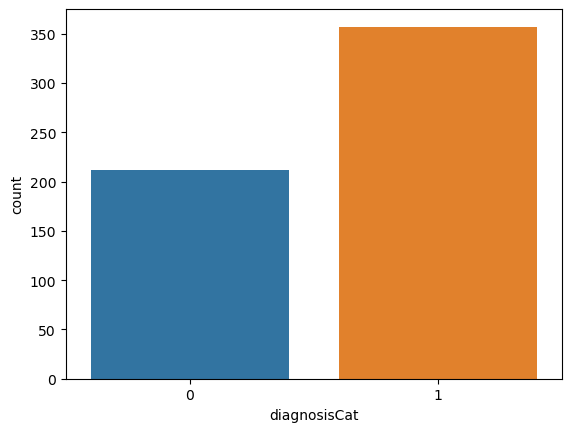

In [9]:
sns.countplot(x='diagnosisCat', data=df)

In [10]:
df['diagnosisCat'].value_counts()

1    357
0    212
Name: diagnosisCat, dtype: int64

### Divisão dos dados em Treino e Teste:

In [11]:
X = df.drop('diagnosisCat', axis=1)
y = df['diagnosisCat']
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diagnosisCat, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [14]:
X_train.shape # treina o algoritmo

(455, 30)

In [15]:
X_test.shape # testa o algoritmo

(114, 30)

### Escalonamento dos Dados

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train) # transforma os dados em um array, porém já escalona os dados
X_train

array([[-0.27914259,  0.01254364, -0.36045284, ..., -1.59146871,
        -0.75525301, -1.19510832],
       [-0.32838043,  2.26039928, -0.36509258, ..., -0.74909183,
        -0.87172233, -0.64301263],
       [ 0.50287016, -0.00850808,  0.67252257, ...,  1.57628782,
         2.38420358,  1.2444247 ],
       ...,
       [-0.68173433, -0.51141023, -0.73627198, ..., -1.09828224,
        -0.24765538, -0.8845907 ],
       [-0.33417311, -0.29387581, -0.33598874, ..., -0.52480233,
        -0.16421467, -0.25138966],
       [-1.36671957, -1.25289851, -1.315818  , ..., -0.62872991,
         1.40377528,  0.36501099]])

In [17]:
X_train = pd.DataFrame(X_train, columns=X.columns) # transformando os dados em DataFrame novamente, pois estavam como array
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.279143,0.012544,-0.360453,-0.339534,-1.144657,-1.294406,-1.138826,-1.173100,0.061649,-1.152772,...,-0.394390,-0.548535,-0.482808,-0.432518,-1.359540,-1.230615,-1.309608,-1.591469,-0.755253,-1.195108
1,-0.328380,2.260399,-0.365093,-0.377421,-1.098304,-0.890345,-0.318883,-0.655757,-0.909047,-0.845140,...,-0.467366,1.677840,-0.526257,-0.485783,-0.414258,-0.574534,-0.094478,-0.749092,-0.871722,-0.643013
2,0.502870,-0.008508,0.672523,0.340090,2.070657,2.647124,2.752323,2.050605,2.194878,1.971106,...,0.277417,-0.231660,0.422178,0.113636,1.067908,1.671180,2.130912,1.576288,2.384204,1.244425
3,-0.667253,-0.604973,-0.693249,-0.643808,0.657979,-0.836536,-0.667296,-0.586735,-1.779987,-0.492924,...,-0.587562,-0.015459,-0.609432,-0.577684,-0.212353,-0.962585,-0.793772,-0.674746,-2.019032,-0.584501
4,-0.447131,-0.455272,-0.451561,-0.477867,-0.506009,-0.531753,-0.665021,-0.648774,-1.062516,-0.342823,...,-0.430878,-0.203604,-0.402737,-0.464027,-0.189409,0.006232,-0.300803,-0.117231,0.280802,-0.400276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,-0.160393,-0.118445,-0.156726,-0.269339,0.834563,0.212831,-0.585781,-0.438486,-0.306678,0.059923,...,-0.153999,-0.068272,-0.120938,-0.253030,1.407475,0.411325,0.013453,0.468144,1.120425,0.181365
451,1.218267,-0.130140,1.229292,1.146005,1.371675,0.901819,1.223748,1.561811,1.109080,0.049520,...,0.972835,-0.238262,0.909431,0.874537,-0.171054,-0.130766,-0.002109,0.308497,0.256466,-0.211416
452,-0.681734,-0.511410,-0.736272,-0.651444,-1.511806,-1.325976,-1.036912,-0.972936,-0.506189,-0.810959,...,-0.598293,-0.962783,-0.688571,-0.585561,-1.475177,-1.211934,-1.165959,-1.098282,-0.247655,-0.884591
453,-0.334173,-0.293876,-0.335989,-0.400917,0.234175,-0.151320,-0.627542,-0.663277,-0.325862,-0.415644,...,-0.392244,-0.124385,-0.431910,-0.436269,-0.129756,-0.233023,-0.449898,-0.524802,-0.164215,-0.251390


In [18]:
X_test = sc.transform(X_test)  # transforma os dados em um array, porém já escalona os dados
X_test

array([[ 1.12848036,  0.41252627,  1.40222753, ...,  1.30864299,
         0.64585552,  2.1018241 ],
       [ 0.09448573, -1.35347894,  0.05712399, ..., -0.06401498,
         0.32773783, -1.32082161],
       [ 1.78015765,  0.09441143,  1.68483003, ...,  0.46501398,
         0.31556939, -1.40134764],
       ...,
       [-0.28493527, -0.19563446, -0.36045284, ..., -0.98073764,
        -1.54098633, -1.26462719],
       [ 1.22695604,  0.16926198,  1.19976604, ...,  1.25855741,
         0.32947618,  0.00930611],
       [-1.20684141, -0.83654231, -1.18759239, ..., -0.74361372,
        -0.64573709,  0.49651752]])

In [19]:
X_test = pd.DataFrame(X_test, columns=X.columns) # transformando os dados em DataFrame novamente, pois estavam como array
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.128480,0.412526,1.402228,1.031462,1.975007,3.068062,3.120413,1.932435,1.189652,1.245867,...,1.015762,0.364130,1.359441,0.842653,2.550073,2.242113,3.216248,1.308643,0.645856,2.101824
1,0.094486,-1.353479,0.057124,-0.004715,0.213574,-0.532944,-0.381926,-0.048793,1.043855,-1.231538,...,0.150783,-1.431493,0.142861,0.034676,-0.093046,-0.636806,-0.499597,-0.064015,0.327738,-1.320822
2,1.780158,0.094411,1.684830,1.853825,-1.174088,-0.346302,0.397888,0.789946,0.479854,-1.754661,...,1.500837,-0.419805,1.378062,1.504714,-1.208111,-0.628940,-0.010644,0.465014,0.315569,-1.401348
3,-0.849722,-1.063433,-0.883478,-0.793302,0.326882,-0.906428,-0.831799,-0.591301,-0.909047,0.583046,...,-1.012539,-1.444697,-1.048579,-0.859388,-0.464734,-1.096305,-1.121180,-1.091395,-1.688746,-0.601881
4,-0.519539,0.183296,-0.492896,-0.557166,0.989075,0.240629,-0.053858,-0.703294,1.231856,0.917429,...,-0.624049,-0.231660,-0.641398,-0.636576,0.388773,-0.118967,0.455720,-0.499447,-0.285899,0.282168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-1.325881,-0.219025,-1.321723,-1.069674,0.348955,-0.864135,-0.785352,-0.907406,-1.139251,1.014028,...,-0.868733,-0.091377,-0.931266,-0.778553,0.072149,-0.948819,-0.744576,-0.974633,-0.729178,-0.125097
110,0.966285,0.889699,0.837023,0.852598,-0.701724,-0.797818,-0.761125,-0.523085,-0.916720,-1.441085,...,0.811858,0.973124,0.695288,0.681358,-0.354604,-0.662370,-0.710941,-0.476438,-0.732654,-1.064181
111,-0.284935,-0.195634,-0.360453,-0.349520,-0.465542,-1.298972,-0.805162,-0.499988,-1.288884,-0.614787,...,-0.594001,-0.456113,-0.662191,-0.579184,-1.593107,-1.333659,-1.076251,-0.980738,-1.540986,-1.264627
112,1.226956,0.169262,1.199766,1.166564,-0.112372,0.117524,0.360410,0.702392,-0.034269,-0.794611,...,1.462202,0.344326,1.471168,1.409062,0.572323,0.052116,0.580719,1.258557,0.329476,0.009306


### Escolhendo os melhores hiperparâmetros:

In [20]:
params = [ 
    {
    'n_neighbors':[1, 3, 6, 9, 12, 15],
    'weights':['uniform', 'distance']
    }
]
ins = KNeighborsClassifier()
grid_search = GridSearchCV(ins, params, cv=5)
grid_search.fit(X_train, y_train)
grid_search.best_params_

C:\Users\kadek\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kadek\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

C:\Users\kadek\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kadek\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

{'n_neighbors': 6, 'weights': 'distance'}

In [21]:
ins = KNeighborsClassifier(n_neighbors=6, weights='distance')

### Ajustando e fazendo previsões:

In [23]:
ins.fit(X_train, y_train)
pred = ins.predict(X_test)
pred[:5]

array([0, 1, 0, 1, 1], dtype=int64)

In [24]:
y_test[:5]

400    0
225    1
321    0
173    1
506    1
Name: diagnosisCat, dtype: int64

### Testando o Desempenho:

In [25]:
ins.score(X_test, y_test)

0.9649122807017544

In [26]:
cross = cross_val_score(ins, X_test, y_test, cv=10, scoring="accuracy")
final = sum(cross) / len(cross)
final

0.956060606060606

In [27]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96        49
           1       0.96      0.98      0.97        65

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [28]:
print(confusion_matrix(y_test, pred))

[[46  3]
 [ 1 64]]


# Conclusão:
### Para esse DataSet de Câncer e para essa finalidade, o KNN se comportou como um ótimo algoritmo